### AIML: REVISION Practice - (27th April 2022, Wednesday)

#### Problem:
1. Load the Breast Cancer Dataset.   
2. Perform supervised learning using following Classification Algorithms:  
   1. Logistic Regression
   2. Decision Tree
   3. Random Forest
   4. Multi Layer Perceptron

3. For each algorithm, check the classifier performance (in terms of accuracy) for 3 different train: test split ratios:
   1. 70:30
   2. 75:25
   3. 80:20

4. For each classifier and for the 3 split ratios, illustrate the performance using a line plot.  
5. In each case, find the confusion Matrix  
6. Finally determine which classifier in which split ratio has the least number of:
   1. False positives
   2. False negatives


In [1]:
from sklearn.datasets import load_breast_cancer

cancer_dataset = load_breast_cancer()

x = cancer_dataset.data
y = cancer_dataset.target

#### Importing Models

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


#### Splitting the data

In [3]:
from sklearn.model_selection import train_test_split as tts

splits = {
    70:30,
    75:25,
    80:20
}
trains = splits.keys()

x_trains, x_tests, y_trains, y_tests = ([] for _ in range(4))

for split in splits.values():
    ts = split/100
    x_train, x_test, y_train, y_test = tts(x, y, test_size=ts)
    x_trains.append(x_train)
    x_tests.append(x_test)
    y_trains.append(y_train)
    y_tests.append(y_test)


#### Common Functions for plotting

In [4]:
from matplotlib import pyplot as plt

def plot_performance(model: str, accuracies: list[float]) -> None:
    plt.title(f'PERFORMANCE OF {model} MODEL')
    plt.ylabel('ACCURACY')
    plt.xlabel('TRAIN SIZE')
    plt.ylim(.8,1)
    plt.plot(trains, accuracies)
    plt.show()


def plot_errors(model: str, rmse: list[float], r2se: list[float]) -> None:
    plt.title(f'ERRORs OF {model} MODEL')
    plt.ylabel('ERROR')
    plt.xlabel('TRAIN SIZE')
    plt.plot(trains, rmse)
    plt.plot(trains, r2se)
    plt.legend(["r2Score", "RMSE"], loc='upper right')
    plt.show()

#### Common Functions for error calculations

In [5]:
# Importing Error Calculating Modules

# Formula for Mean Squared Error
# sum((yi - yi_)**2 for yi, yi_ in zip(y_test, y_pred))/ len(y_test)
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
import numpy as np

def calculate_and_plot_errors(predictions, model):
    rmse, r2se = [], []
    # Errors
    for y_test, y_pred in zip(y_tests, predictions):
        RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
        R2SR = r2_score(y_test, y_pred)
        rmse.append(RMSE)
        r2se.append(R2SR)
        # print(f'For {train}% Training data')
        # print(f"RMSE Error: {RMSE:.2f}")
        # print(f"R2SR Error: {R2SR:.2f}\n")

    # Plotting the Errors:
    plot_errors(model, rmse, r2se)


def calculate_confusion_matrix(predictions):
    false_negatives, false_positives = dict(), dict()

    print("Confusion Matrices: ")
    for y_test, y_pred, train in zip(y_tests, predictions, trains):
        cf_matrix = confusion_matrix(y_test, y_pred)
        (TP, FP), (FN, TN) = cf_matrix
        false_positives[train] = FP
        false_negatives[train] = FN
        print(f"Training: {train}%", cf_matrix, '', sep='\n')


    # Determining minimum False positives, False negatives
    min_FP = min(false_positives, key=false_positives.get)
    min_FN = min(false_negatives, key=false_negatives.get)

    print(
        f"Least number of false positives is {false_positives[min_FP]} "
        f"in split ratio {min_FP}:{100-min_FP}"
    )
    print(
        f"Least number of false negatives is {false_negatives[min_FN]} "
        f"in split ratio {min_FN}:{100-min_FN}"
    )

#### 1. Logistic Regression  

Performance

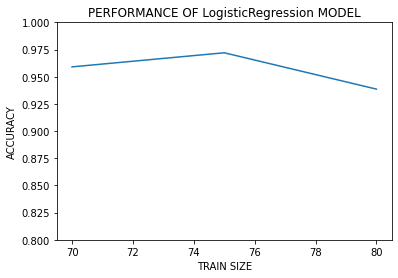

In [6]:
model = 'LogisticRegression'
accuracies, predictions = [], []

for x_train, x_test, y_train, y_test in zip(
    x_trains, x_tests, y_trains, y_tests
    ):
    # Creating and training the model
    LogRegModel = LogisticRegression(solver='newton-cg')
    LogRegModel.fit(x_train, y_train)

    # Checking Predictions and Accuracy of the model
    y_pred = LogRegModel.predict(x_test)
    accuracy = LogRegModel.score(x_test, y_test)
    
    # Storing preds and accuracy for Plotting
    predictions.append(y_pred) 
    accuracies.append(accuracy)
    
# Plotting the accuracies:

# print(accuracies)
plot_performance(model, accuracies)


Errors

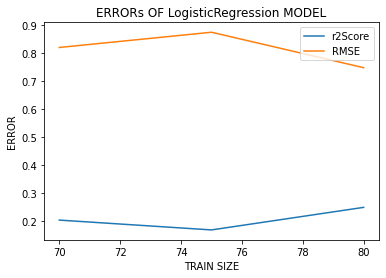

In [7]:
calculate_and_plot_errors(predictions, model)

Confusion Matrix

In [8]:
calculate_confusion_matrix(predictions)

Confusion Matrices: 
Training: 70%
[[ 55   4]
 [  3 109]]

Training: 75%
[[45  2]
 [ 2 94]]

Training: 80%
[[43  4]
 [ 3 64]]

Least number of false positives is 2 in split ratio 75:25
Least number of false negatives is 2 in split ratio 75:25


#### 2. Decision Tree

Performance

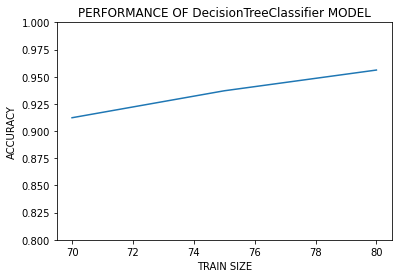

In [9]:
model = 'DecisionTreeClassifier'
accuracies.clear()
predictions.clear()


for x_train, x_test, y_train, y_test in zip(
    x_trains, x_tests, y_trains, y_tests
    ):
    DecTreeModel = DecisionTreeClassifier(criterion='entropy')
    DecTreeModel.fit(x_train, y_train)

    y_pred = DecTreeModel.predict(x_test)
    accuracy = DecTreeModel.score(x_test, y_test)
    
    predictions.append(y_pred) 
    accuracies.append(accuracy)

plot_performance(model, accuracies)


Errors

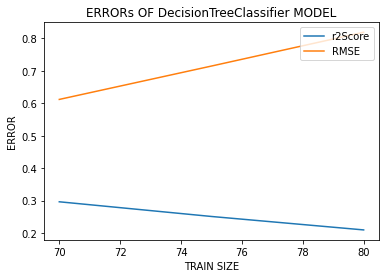

In [10]:
calculate_and_plot_errors(predictions, model)

Confusion Matrix

In [11]:
calculate_confusion_matrix(predictions)

Confusion Matrices: 
Training: 70%
[[ 53   6]
 [  9 103]]

Training: 75%
[[45  2]
 [ 7 89]]

Training: 80%
[[44  3]
 [ 2 65]]

Least number of false positives is 2 in split ratio 75:25
Least number of false negatives is 2 in split ratio 80:20


#### 3. Random Forest

Performance

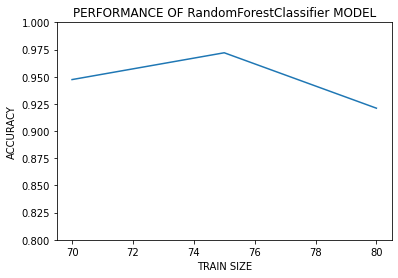

In [12]:
model = 'RandomForestClassifier'
accuracies.clear()
predictions.clear()


for x_train, x_test, y_train, y_test in zip(
    x_trains, x_tests, y_trains, y_tests
    ):
    RandomForestModel = RandomForestClassifier()
    RandomForestModel.fit(x_train, y_train)

    y_pred = RandomForestModel.predict(x_test)
    accuracy = RandomForestModel.score(x_test, y_test)
    
    predictions.append(y_pred) 
    accuracies.append(accuracy)

plot_performance(model, accuracies)


Errors

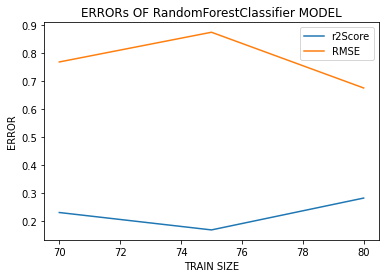

In [13]:
calculate_and_plot_errors(predictions, model)

Confusion Matrix

In [14]:
calculate_confusion_matrix(predictions)

Confusion Matrices: 
Training: 70%
[[ 56   3]
 [  6 106]]

Training: 75%
[[45  2]
 [ 2 94]]

Training: 80%
[[41  6]
 [ 3 64]]

Least number of false positives is 2 in split ratio 75:25
Least number of false negatives is 2 in split ratio 75:25


### 4. Multi Layer Perceptron

Performance

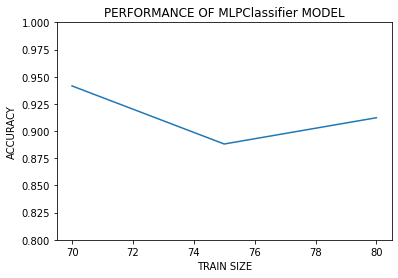

In [15]:
import random


model = "MLPClassifier"
accuracies.clear()
predictions.clear()


for x_train, x_test, y_train, y_test in zip(x_trains, x_tests, y_trains, y_tests):
    MLPModel = MLPClassifier(
        max_iter=350,
        activation="relu",  # relu: Rectified Linear Unit -> an activation function to realign nodes to 0 amd 1
        solver="adam",      # oprimizer for weight
        random_state=random.randint(1, 100)
    )
    MLPModel.fit(x_train, y_train)

    y_pred = MLPModel.predict(x_test)
    accuracy = MLPModel.score(x_test, y_test)

    predictions.append(y_pred)
    accuracies.append(accuracy)

plot_performance(model, accuracies)


Errors

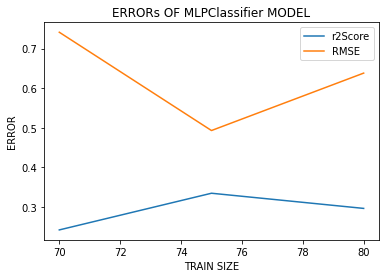

In [16]:
calculate_and_plot_errors(predictions, model)

Confusion Matrix

In [17]:
calculate_confusion_matrix(predictions)

Confusion Matrices: 
Training: 70%
[[ 53   6]
 [  4 108]]

Training: 75%
[[31 16]
 [ 0 96]]

Training: 80%
[[39  8]
 [ 2 65]]

Least number of false positives is 6 in split ratio 70:30
Least number of false negatives is 0 in split ratio 75:25
